# 선형회귀

## Ordinary Least Squared

### OLS 직접 구현

In [1]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

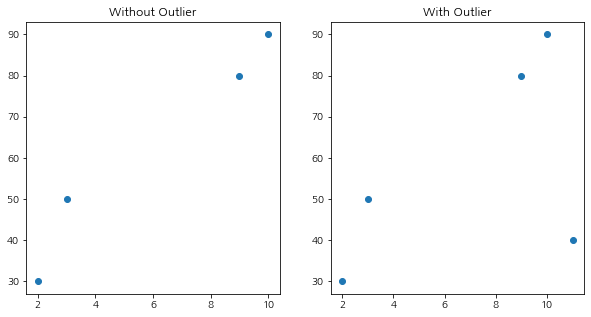

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [3]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b


In [4]:
w1, b1 = OLS(x1, y1) # 이상치 X 기울기와 편향 >>> y = w1 * x + b1
w1,b1

(6.6, 22.900000000000006)

In [5]:
w2, b2 = OLS(x2, y2) # 이상치 O 기울기와 편향 >>> y = w2 * x + b2
w2,b2

(3.4285714285714284, 34.0)

In [7]:
x1_pred = x1*w1+b1
x2_pred = x2*w2+b2
x1_pred,x2_pred

(array([88.9, 82.3, 42.7, 36.1]),
 array([68.28571429, 64.85714286, 44.28571429, 40.85714286, 71.71428571]))

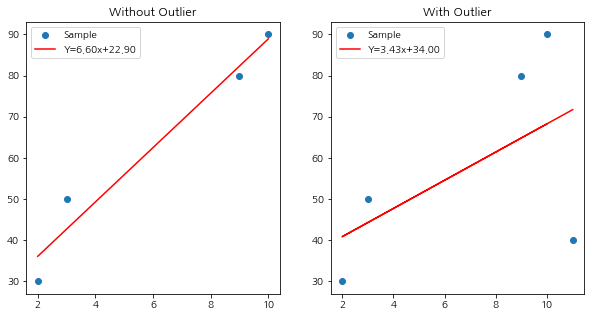

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()


이상치가 있을 때와 없을 때 차이가 심하게 난다는 결과를 알 수 있다.

### Scikit-learn을 이용한 OLS 구현

In [9]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1,1), y1)
model1.coef_, model1.intercept_ # coef는 기울기, intercept는 y절편

(array([6.6]), 22.899999999999984)

In [10]:
model2 = LinearRegression().fit(x2.reshape(-1,1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

직접 계산한것과 동일한 결과가 나온다.

## Boston 집값 데이터셋 이용한 표준화 및 정규화, 이상치 처리

### IQR을 이용한 이상치 처리

In [31]:
# 경고 메시지 생략
import warnings
warnings.filterwarnings(action='ignore') 
# 경고메시지 다시 나타내기
# warnings.filterwarnings(action='default') 

# 보스턴 데이터셋 가져오기
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [32]:
# Boston dataset DataFrame으로 변환하기
import pandas as pd
boston_df = pd.DataFrame(
    boston['data'],
    columns = boston['feature_names']
)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [34]:
boston_df['price'] = boston['target'] #집값
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [35]:
# 선형회귀 모델링
X = boston_df.drop(columns='price')
y = boston_df['price']

In [36]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100) # 선형회귀 모델에선 stratify 쓰면 안됨.

In [37]:
# 모델
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.7421573768304615, 0.7246154314616745)

#### 표준화 및 정규화

In [38]:
# 전체 데이터 표준화하고 데이터 분할 (권장))
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X) 

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=100) # 선형회귀 모델에선 stratify 쓰면 안됨.

In [ ]:
# 데이터 분할을 먼저하고 학습데이터를 기준으로 평균과 표준편차를 구해 표준화 (복잡하기 때문에 권장하지 않음)
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100) # 선형회귀 모델에선 stratify 쓰면 안됨.

# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train) 
X_test_sc = scaler.transform(X_test) 

In [39]:
# 모델
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train,y_train), model.score(X_test,y_test) # 이 데이터셋에선 표준화가 유의미하진 않음

(0.7421573768304615, 0.7246154314616726)

In [41]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X) 

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=100)

In [42]:
# 모델
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train,y_train), model.score(X_test,y_test) # 이 데이터셋에선 정규화 역시 유의미하지 않음

(0.7421573768304616, 0.7246154314616737)

#### 이상치 처리

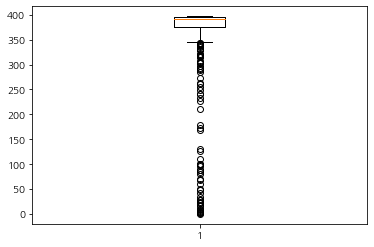

In [46]:
# 이상치 확인
import matplotlib.pyplot as plt
# _= plt.boxplot(boston['data'])
_ = plt.boxplot(boston_df['B']) # 이상치 처리는 칼럼별로 해야하기 때문에 가장 두드러지는 칼럼부터 처리해나가기.
plt.show()

In [47]:
# 이상치 기준 정의
Q1 = boston_df['B'].quantile(0.25)
Q3 = boston_df['B'].quantile(0.75)
IQR = Q3- Q1
MIN = Q1 - 1.5*IQR
MAX = Q3 + 1.5*IQR
MIN, MAX

(344.10624999999993, 427.49625000000003)

In [51]:
# 이상치 대상 설정
target = boston_df['B'][
    (boston_df['B']<MIN) | (boston_df['B'] >MAX)]
target

18     288.99
25     303.42
27     306.38
32     232.60
34     248.31
        ...  
466     22.01
467    331.29
475    302.76
489    344.05
490    318.43
Name: B, Length: 77, dtype: float64

In [53]:
target.index

Int64Index([ 18,  25,  27,  32,  34, 102, 118, 134, 145, 146, 151, 152, 153,
            154, 155, 156, 160, 165, 167, 168, 169, 170, 286, 366, 367, 384,
            399, 404, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417,
            418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
            431, 432, 433, 434, 435, 436, 437, 438, 444, 445, 446, 449, 450,
            454, 455, 456, 457, 458, 460, 465, 466, 467, 475, 489, 490],
           dtype='int64')

In [54]:
# 이상치 행들 제거
boston_df = boston_df.drop(target.index)

In [55]:
# 이상치 제거된 데이터에 대해 회귀분석 스코어링
X = boston_df.drop(columns='price')
y = boston_df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train,y_train), model.score(X_test,y_test) 
# training 점수는 내려갔지만, 실제 예측하는 test 점수가 올라갔으므로 유의미하게 개선됐음을 알 수 있다.
# 테스트 점수가 훈련 점수보다 높은게 이상적이다.

(0.7333970447189132, 0.7605037585652699)

### 로그 변환

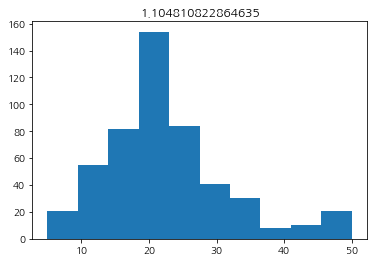

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

_= plt.hist(boston['target']) # 보스턴 데이터셋의 경우 y값이 한쪽으로 쏠려 있지 않아서 즉, 왜도(skew)가 낮아서 굳이 로그변환이 필요 없다.
_= plt.title(f"{skew(boston['target'])}") # skew값이 0일 경우 가장 이상적, 1도 신경 안써도 될 정도.
plt.show()

## 경사 하강법 (Gradient Descent)

### 경사 하강법 직접 구현

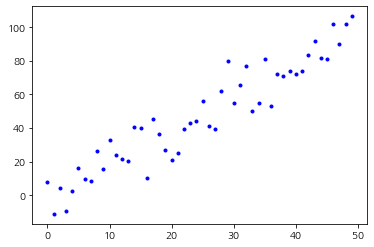

In [59]:
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50) #(W, b) = (2,10) 인 경우에 난수값으로 오차값을 생성함.
_ = plt.plot(X, Y, 'b.') # 난수값에 의해 노이즈가 포함된 데이터그룹이 생성됨



In [62]:
X = X.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
model.score(X,Y)
model.coef_, model.intercept_

(array([2.01016495]), -2.0345524899533416)

In [63]:
pred = model.predict(X) # 예측값

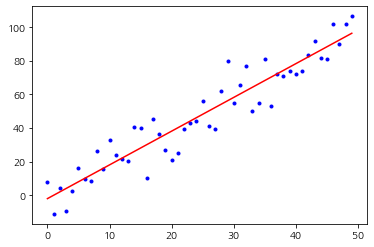

In [65]:
_ = plt.plot(X, Y, 'b.')
_ = plt.plot(X, pred, 'r-')


## 다항회귀

In [66]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(5).reshape(-1, 1)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())


,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [67]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())


,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


In [68]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2, include_bias=False)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())


,x0,x1,x0^2,x0 x1,x1^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0
3,6.0,7.0,36.0,42.0,49.0
4,8.0,9.0,64.0,72.0,81.0


In [75]:
P = PolynomialFeatures(degree=5, include_bias=False)
x_poly = P.fit_transform(boston_df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
boston_df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape


((429, 13), (429, 8567))

In [76]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)


(1.0, -346.41381267771015)

다항 변환을 했을 때, 훈련 점수가 올라갔으나, 테스트점수는 떨어졌다.
테스트 점수를 올리기 위한 처리 역시 존재한다. 